In [1]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'F:\\Summer 2021\\cse465\Pneumonia dataset\\chest_xray\\train'
valid_path = 'F:\\Summer 2021\\cse465\Pneumonia dataset\\chest_xray\\test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in vgg.layers:
    layer.trainable = False

In [5]:
folders = glob('F:\\Summer 2021\\cse465\Pneumonia dataset\\chest_xray\\train\\*')

In [6]:

# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [7]:

prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('F:\\Summer 2021\\cse465\Pneumonia dataset\\chest_xray\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory('F:\\Summer 2021\\cse465\Pneumonia dataset\\chest_xray\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

c:\users\rifat hossain\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
163/163 [==============================] - 1800s 11s/step - loss: 0.1741 - accuracy: 0.9327 - val_loss: 0.3265 - val_accuracy: 0.9006
Epoch 2/5
163/163 [==============================] - 1869s 11s/step - loss: 0.0994 - accuracy: 0.9620 - val_loss: 0.2730 - val_accuracy: 0.9071
Epoch 3/5
163/163 [==============================] - 1839s 11s/step - loss: 0.1064 - accuracy: 0.9624 - val_loss: 0.5109 - val_accuracy: 0.8622
Epoch 4/5
163/163 [==============================] - 1780s 11s/step - loss: 0.0907 - accuracy: 0.9640 - val_loss: 0.3541 - val_accuracy: 0.9054
Epoch 5/5
163/163 [==============================] - 1711s 11s/step - loss: 0.0714 - accuracy: 0.9739 - val_loss: 0.4571 - val_accuracy: 0.8317


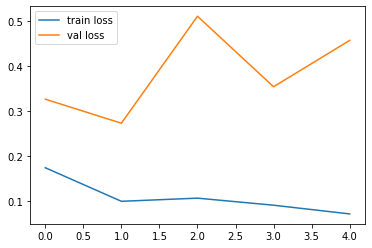

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
#Implementing vgg19 model 

In [16]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [17]:
IMAGE_SIZE = [224, 224]

train_path = 'F:\\Summer 2021\\cse465\Pneumonia dataset\\chest_xray\\train'
valid_path = 'F:\\Summer 2021\\cse465\Pneumonia dataset\\chest_xray\\test'

In [18]:
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [19]:
for layer in mobilnet.layers:
    layer.trainable = False

In [20]:
folders = glob('F:\\Summer 2021\\cse465\Pneumonia dataset\\chest_xray\\train/*')

In [21]:
folders

['F:\\Summer 2021\\cse465\\Pneumonia dataset\\chest_xray\\train\\NORMAL',
 'F:\\Summer 2021\\cse465\\Pneumonia dataset\\chest_xray\\train\\PNEUMONIA']

In [22]:
x = Flatten()(mobilnet.output)

In [23]:
prediction = Dense(len(folders), activation='softmax')(x)

In [24]:
model = Model(inputs=mobilnet.input, outputs=prediction)

In [25]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [26]:

from tensorflow.keras.layers import MaxPooling2D

In [27]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 50176)             0

In [28]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [29]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [30]:
training_set = train_datagen.flow_from_directory('F:\\Summer 2021\\cse465\Pneumonia dataset\\chest_xray\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [31]:
training_set

In [32]:
test_set = test_datagen.flow_from_directory('F:\\Summer 2021\\cse465\Pneumonia dataset\\chest_xray\\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [ ]:
test_set

In [33]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
163/163 [==============================] - 259s 2s/step - loss: 0.4018 - accuracy: 0.8533 - val_loss: 0.3657 - val_accuracy: 0.8798
Epoch 2/50
163/163 [==============================] - 258s 2s/step - loss: 0.1996 - accuracy: 0.9153 - val_loss: 0.5087 - val_accuracy: 0.8558
Epoch 3/50
163/163 [==============================] - 256s 2s/step - loss: 0.1746 - accuracy: 0.9333 - val_loss: 0.6043 - val_accuracy: 0.8173
Epoch 4/50
163/163 [==============================] - 248s 2s/step - loss: 0.1541 - accuracy: 0.9411 - val_loss: 0.5880 - val_accuracy: 0.8173
Epoch 5/50
163/163 [==============================] - 261s 2s/step - loss: 0.1349 - accuracy: 0.9469 - val_loss: 0.4610 - val_accuracy: 0.8622
Epoch 6/50
163/163 [==============================] - 266s 2s/step - loss: 0.1483 - accuracy: 0.9471 - val_loss: 0.7992 - val_accuracy: 0.8109
Epoch 7/50
163/163 [==============================] - 253s 2s/step - loss: 0.1213 - accuracy: 0.9525 - val_loss: 0.5569 - val_accuracy: 0.8718

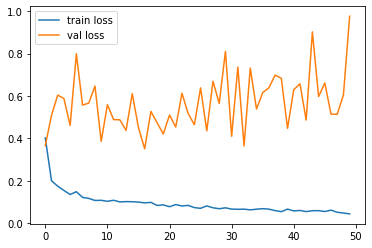

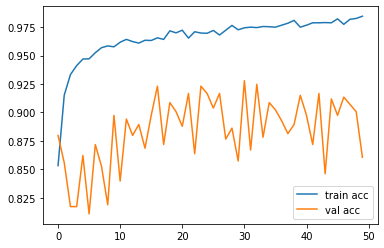

<Figure size 432x288 with 0 Axes>

In [34]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [35]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [36]:
y_pred = model.predict(test_set)

In [37]:
y_pred

array([[3.1615911e-11, 1.0000000e+00],
       [6.8876709e-08, 9.9999988e-01],
       [9.4833338e-01, 5.1666681e-02],
       ...,
       [7.2650957e-01, 2.7349043e-01],
       [9.9840015e-01, 1.5998535e-03],
       [9.9147910e-01, 8.5209096e-03]], dtype=float32)

In [38]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [39]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,

In [40]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [41]:
model=load_model('model_vgg19.h5')

In [42]:
img=image.load_img('F:\\Summer 2021\\cse465\\Pneumonia dataset\\chest_xray\\test\\PNEUMONIA\\person10_virus_35.jpeg',target_size=(224,224))

In [43]:
x=image.img_to_array(img)
x

array([[[ 63.,  63.,  63.],
        [ 72.,  72.,  72.],
        [ 98.,  98.,  98.],
        ...,
        [ 30.,  30.,  30.],
        [ 42.,  42.,  42.],
        [ 36.,  36.,  36.]],

       [[ 69.,  69.,  69.],
        [100., 100., 100.],
        [100., 100., 100.],
        ...,
        [ 37.,  37.,  37.],
        [ 33.,  33.,  33.],
        [ 35.,  35.,  35.]],

       [[ 86.,  86.,  86.],
        [103., 103., 103.],
        [101., 101., 101.],
        ...,
        [ 25.,  25.,  25.],
        [ 28.,  28.,  28.],
        [ 28.,  28.,  28.]],

       ...,

       [[ 42.,  42.,  42.],
        [ 42.,  42.,  42.],
        [ 41.,  41.,  41.],
        ...,
        [ 40.,  40.,  40.],
        [ 40.,  40.,  40.],
        [ 40.,  40.,  40.]],

       [[ 42.,  42.,  42.],
        [ 42.,  42.,  42.],
        [ 41.,  41.,  41.],
        ...,
        [ 40.,  40.,  40.],
        [ 40.,  40.,  40.],
        [ 40.,  40.,  40.]],

       [[ 42.,  42.,  42.],
        [ 42.,  42.,  42.],
        [ 41.,  

In [44]:
x.shape

(224, 224, 3)

In [45]:
x=x/255

In [46]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [47]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [48]:
a=np.argmax(model.predict(img_data), axis=1)

In [49]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected


In [50]:
img=image.load_img('F:\\Summer 2021\\cse465\\Pneumonia dataset\\chest_xray\\test\\NORMAL\\IM-0019-0001.jpeg',target_size=(224,224))
x=image.img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
model.predict(img_data)
a=np.argmax(model.predict(img_data), axis=1)
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected


In [51]:
img=image.load_img('F:\\Summer 2021\\cse465\\Pneumonia dataset\\chest_xray\\val\\PNEUMONIA\\person1952_bacteria_4883.jpeg',target_size=(224,224))
x=image.img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
model.predict(img_data)
a=np.argmax(model.predict(img_data), axis=1)
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
